2023-05-19    1869.640465
2023-05-20    1869.353025
2023-05-21    1869.178500
2023-05-22    1869.072021
2023-05-23    1869.010944
2023-05-24    1868.979661
2023-05-25    1868.967256
2023-05-26    1868.966474
2023-05-27    1868.972706
2023-05-28    1868.983116
2023-05-29    1868.995989
2023-05-30    1869.010305
2023-05-31    1869.025459
2023-06-01    1869.041095
2023-06-02    1869.057003
2023-06-03    1869.073061
2023-06-04    1869.089197
2023-06-05    1869.105368
2023-06-06    1869.121550
2023-06-07    1869.137728
2023-06-08    1869.153893
2023-06-09    1869.170042
2023-06-10    1869.186169
2023-06-11    1869.202276
2023-06-12    1869.218359
2023-06-13    1869.234418
2023-06-14    1869.250454
2023-06-15    1869.266467
2023-06-16    1869.282455
2023-06-17    1869.298419
Freq: D, Name: Lần cuối, dtype: float64


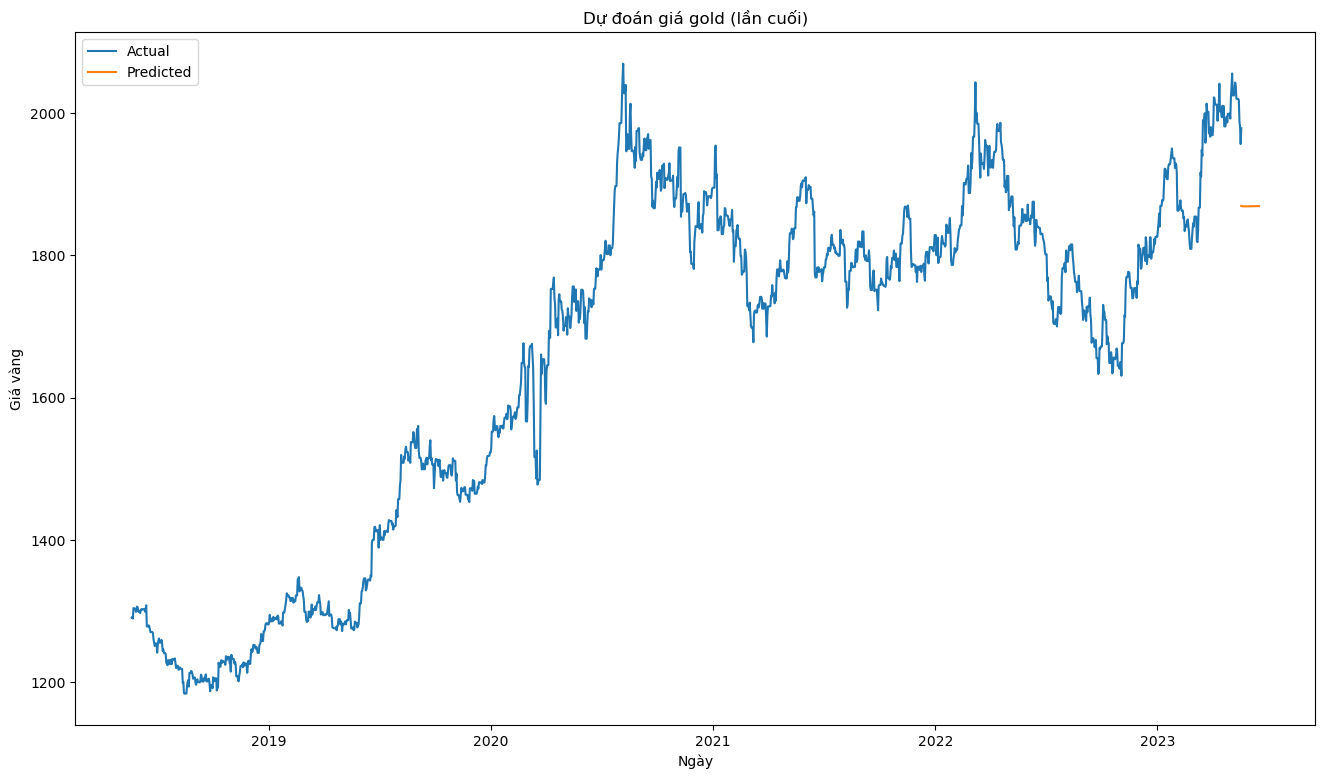

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data_gold = pd.read_csv("./data/GoldData.csv", na_values=['null'], index_col='Ngày', parse_dates=True, infer_datetime_format=True)
data_gold = data_gold.drop('KL', axis=1)
data_gold.dropna(inplace=True)

# Chuyển đổi thành tần suất hàng ngày
data_gold = data_gold.resample('D').ffill()

# Chia tập train-test-validate theo tỉ lệ 7:2:1
train_size = int(len(data_gold) * 0.7)
val_size = int(len(data_gold) * 0.1)  # 10% dữ liệu cho tập validate
test_size = len(data_gold) - train_size - val_size

train_data = data_gold[:train_size].copy()
val_data = data_gold[train_size:train_size+val_size].copy()
test_data = data_gold[train_size+val_size:].copy()

# Huấn luyện mô hình VAR trên tập train
model = VAR(train_data)
model_fit = model.fit()

# Dự đoán giá vàng trong 30 ngày tiếp theo
forecast = model_fit.forecast(model_fit.endog, steps=30)
last_date = data_gold.index[-1]
date_range = pd.date_range(start=last_date, periods=30, freq='D')
predictions = pd.DataFrame(forecast, index=date_range, columns=data_gold.columns)
predicted_gold_prices = predictions['Lần cuối']

# In kết quả dự đoán
print(predicted_gold_prices)

# Vẽ đồ thị dự đoán
plt.figure(figsize=(16, 9))
plt.plot(data_gold.index, data_gold['Lần cuối'], label='Actual')
plt.plot(predicted_gold_prices.index, predicted_gold_prices, label='Predicted')
plt.title('Dự đoán giá gold (lần cuối)')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.legend()
plt.show()


## Đánh giá mô hình

In [7]:
# Tính toán các chỉ số đánh giá
actual_prices = test_data['Lần cuối']
mae = np.mean(np.abs(predicted_gold_prices - actual_prices))
rmse = np.sqrt(np.mean((predicted_gold_prices - actual_prices)**2))
mape = np.mean(np.abs((predicted_gold_prices - actual_prices) / actual_prices)) * 100

# In kết quả đánh giá
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 109.05953472091983
Root Mean Squared Error (RMSE): 109.05953472091983
Mean Absolute Percentage Error (MAPE): 5.511676086365787
